# Linear regression (Google EOD Stock Prices)

## STEP 1: Import
First we need to import modules for data analysis and our stock data.


In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import math, datetime
import quandl as dataStock
import matplotlib.pyplot as plt
from matplotlib import style

In [14]:
df = dataStock.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

## STEP 2: Prepare and clean data
In this step we need to choose meaningful features. The choosen features are the adjusted ones becouse they show the stoc's price which has been amended to include any distributions and corporate action that occurred at any time prior to the next day's open. Open and close features show us the opening price of stock and the closing price which tell's us if the price went up or down also features high and low show us the price volatility. Volume show's us the number with trades which can coorelate with stock volatility.

In [15]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df.fillna(-9999, inplace=True)
#Drop NaN values
df.dropna(inplace=True)

print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0


#### Percentage change of volatility

In [16]:
df['Volatility_percentage'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0

#### Percentage daily change

In [17]:
df['Daily_percentage'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

#### Transformed data (features)

In [18]:
df = df[['Adj. Close', 'Volatility_percentage', 'Daily_percentage', 'Adj. Volume']]
print(df.head())

            Adj. Close  Volatility_percentage  Daily_percentage  Adj. Volume
Date                                                                        
2004-08-19   50.322842               8.441017          0.324968   44659000.0
2004-08-20   54.322689               8.537313          7.227007   22834300.0
2004-08-23   54.869377               4.062357         -1.227880   18256100.0
2004-08-24   52.597363               7.753210         -5.726357   15247300.0
2004-08-25   53.164113               3.966115          1.183658    9188600.0


#### Transformed data (label)
We are using 1% (34 days) stock price closing values as our targeted values.

In [19]:
forecast_col = 'Adj. Close'
forecast_days = int(math.ceil(0.01*len(df)))
df['Label'] = df[forecast_col].shift(-forecast_days)
df.dropna(inplace=True)
print(df.head())


            Adj. Close  Volatility_percentage  Daily_percentage  Adj. Volume  \
Date                                                                           
2004-08-19   50.322842               8.441017          0.324968   44659000.0   
2004-08-20   54.322689               8.537313          7.227007   22834300.0   
2004-08-23   54.869377               4.062357         -1.227880   18256100.0   
2004-08-24   52.597363               7.753210         -5.726357   15247300.0   
2004-08-25   53.164113               3.966115          1.183658    9188600.0   

                Label  
Date                   
2004-08-19  69.639972  
2004-08-20  69.078238  
2004-08-23  67.839414  
2004-08-24  68.912727  
2004-08-25  70.668146  


## STEP 3: Train the alghoritm and test the trained model

In [20]:
#features
X = np.array(df.drop(['Label'], 1))
#label
y = np.array(df['Label'])


In [21]:
#Standardize feature data
X = preprocessing.scale(X)
#The newest 34 days of stock data
X_lately = X[-forecast_days:]

y = np.array(df['Label'])

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

classifier = LinearRegression()
classifier.fit(X_train, y_train)

#Confidence shows us accuracy
confidence = classifier.score(X_test, y_test)


## STEP 4: Prediction
Prediction of stock values fot the next 34 days.

In [23]:
forecast_set = classifier.predict(X_lately)
print(forecast_set, confidence, forecast_days)


[  996.64377725   982.57569251   958.46514418   969.73124185   947.7518583
   940.63680733   930.22505472   942.20856622   938.01911717   951.11165064
   961.74478309   964.61138835   978.2755048    979.55458809   988.31642458
   986.80932937   996.79865561  1003.93263986  1003.10950779  1004.70751212
  1008.19636825   978.5041327    976.13603068   961.36716164   968.38833911
   956.02264155   957.91267673   958.01317338   951.89366055   957.20235236
   957.43875627   955.38146316   951.25265929   934.37396892] 0.974926040859 34


<function matplotlib.pyplot.show>

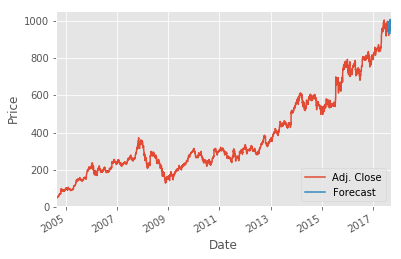

In [24]:
%matplotlib inline
style.use('ggplot')
df['Forecast'] = np.nan

#last value form stock data
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
#number of seconds in a day
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show